<a href="https://colab.research.google.com/github/kaiu85/Workshop_WS22/blob/main/Session_02_building_models_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4EU+ Day Two - Session 2 - Building Models
**Date:** 13.05.2022

By: Koen Frolichs (k.frolichs@gmail.com)

_From Mathematics to code_: In this session we will build Rescorla-Wagner Reinforcement Learning  models in Python one step at a time. At the end you should feel (somewhat) confident in translating your own ideas for models into code that you can run, simulate and analyse.

Stuff we want to do in this session:

*   Translate a mathematical formula into functioning code
*   Visualize our modelling results

## Other Sessions
* [Session 01](https://colab.research.google.com/drive/1BDNNJm0Mtl8fBYpQz7hYtXhjqAWls6H4?usp=sharing)
* [Session 03](https://colab.research.google.com/drive/1oNtwyj_RFRm2DgetjOuZ3GMt9TQofS5b?usp=sharing)


## Translating formulas into code

In the beginning it might be hard to see how a model expressed by a formula can be implemented in code. It might take a bit of adjustment but once you see it it's actually very straightforward.

To start with a simple example:

The formula $\sum_{n=1}^{10}n$ which expresses the summation of the numbers 1-10 (e.g., $1+2+3+\cdots+10$).

Can already easily be expressed in code by you!
You can write your own loop, use an existing function, or create your own function.

In [ ]:
# Write or use code to sum up the first 100 integers
# There's an equation to this: (n*(n+1))/2
n = 100
ans_one = (n*(n+1))//2 # The double // makes it an integer value (instead of a float)
print("Answer One:",ans_one)

# you can do it in a loop
ans_two = 0
for i in range(n+1):
  ans_two += i # += is the same as writing: ans_two = ans_two + i
print("Answer Two:",ans_two)

# This is also a loop but a bit fancier
ans_three = sum([i for i in range(n+1)])
print("Answer Three:",ans_three)

# And probably a lot of other ways to do this!

## Simple Reinforcement Learning
As introduced in the lecture, Rescorla-Wagner (RW) models are simple but powerful models of behavior. That learn through their use of the prediction error (PE). That is, they slowly adjust their expectations based on the PE to match the outcome.

## Toy Problems
Often when programming we create simple idealized problems to understand what's going on (so called: **toy problems**). Toy problems are great because they are an abstraction of reality, this way we can only focus on the things we find important right now! Moreover, real data is often messy, noisy and inconsistent so if something doesn't you cannot be sure if it's a mistake you made or if it's caused by the data. With toy problems it's **always your mistake** ;).
We will use toy problems throughout this notebook.

## Classical Conditioning
Let's try to model the standard classical conditioning paradigm (dog, bell, and food)

Let's assume the dog's prediction for food when hearing a bell can be a value between [0 1], initially it has no expectation so its prediction is 0 ("I will not get any food"). The first time the dog receives food it is very surprised (in modelling terms: its **prediction error** is high). But over time, when the bell is continuously paired with food, it will start to expect the food more and more and thus will have a decreasing learning error.

In a formula we can express this as follows: 

The prediction error at time t, where F is the feedback and P the prediction:

$PE_t = F_t - P_t$

Updating the prediction for the next timepoint (t+1):

$P_{t+1}=P_t+α*PE$

One thing we haven't mentioned yet is: α. This is also called the **learning rate** and determines how fast the dog learns. We will look at α in a bit more detail later. For now, let's say it is 0.1

## One trial

In [ ]:
# General Settings
alpha = 0.1

feedback = 1
first_prediction = 0
print("The first prediction is: ", first_prediction)

PE = feedback - first_prediction
print("The Prediction Error is: ", PE)

next_prediction = first_prediction + (alpha*PE)
print("\nThe next prediction is: ", next_prediction)

## Multiple trials
One trial doesn't tell us much of course.. So let's *simulate* a couple trials in a row.

In [ ]:
alpha = 0.1
trials = 10

feedback = 1 # Here we assume the feedback will always be one
# Let's create a list of predictions and update it per trial that so we can see it change in time
prediction = [0 for _ in range(trials)] # If you don't believe this will create a list with 0's print it!

# Because we have a procedure that needs to be repeated multiple times we can use a loop
# Fill in the rest of the loop
for trial_num in range(trials-1):
  # Calculate the PE (during a specific trial number!)
  # Hint trial numbers are saved in the trial_num variable
  PE = feedback - prediction[trial_num]
  # Update the Prediciton for the next trial
  prediction[trial_num+1] = prediction[trial_num] + alpha*PE

# Print the prediction and see if it increases over time!
# You can play around with the parameters to see how they work
print(prediction)

[0, 0.1, 0.19, 0.271, 0.34390000000000004, 0.40951000000000004, 0.46855900000000006, 0.5217031000000001, 0.5695327900000001, 0.6125795110000001]


## Plotting your results

In [ ]:
# For plotting we will use matplotlib this is not installed on Colab normally
# but we can import it with the following command
!pip install matplotlib

In [ ]:
# Once installed, we have to import it
# We rename it to plt so we don't have to type matplotlib.pyplot every time
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Rescorla-Wagner model')

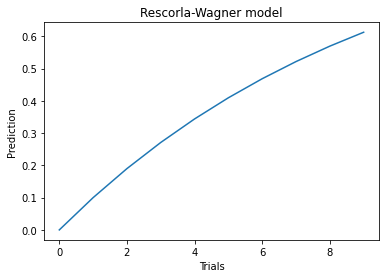

In [ ]:
# If both the installation and importing functioned
# You can plot your results from prediction by running the following code

plt.plot(prediction) # Plotting the predictions

# Adding some labels to the axes and a title!
plt.xlabel('Trials')
plt.ylabel('Prediction')
plt.title('Rescorla-Wagner model')

## Congratulations!
### You have succesfully modelled and visualized learning!

Let's play around with this simple model a little more before we move on to a little more complex models.

## Learning Rate: α
As stated above, α (learning rate) determines how fast an agent learns. Let's try to simulate and plot four different learning rates.

In [ ]:
alpha_nums = [0, .25, .5, 1]
trials     = 10
feedback   = 1
idx = 1 # Will be used for plotting

for alpha in alpha_nums:
  prediction = [0 for _ in range(trials)]
  # This will loop over four alpha values
  # You can copy or rewrite your original code here to simulate the learning four times
  #---------------------------------------------------------------------------#
  for trial_num in range(trials-1):
    # Calculate the PE (during a specific trial number!)
    # Hint trial numbers are saved in the trial_num variable
    PE = feedback - prediction[trial_num]
    # Update the Prediciton for the next trial
    prediction[trial_num+1] = prediction[trial_num] + alpha*PE
  #---------------------------------------------------------------------------#
  
  # This will plot the results in a 2x2 matrix
  plt.subplot(2,2,idx)
  plt.plot(prediction)
  plt.ylim([0,1])
  plt.title('Learning rate: '+str(alpha))
  plt.xlabel('Trials')
  plt.ylabel('Prediction')
  plt.tight_layout()
  idx += 1

## Noisy data environment
Our data is not always this clean, let's use a bit of randomness!

Let's assume the dog will only be rewarded 70% of the time


In [ ]:
# This imports a module that can create (pseudo) random numbers
from random import random

In [ ]:
# Play around with these parameters a little bit to see what happens
trials = 10
reward_probability = .7
alpha = 0.4

# First we need to create a list with rewards
feedback = [] # We will create an empty list and fill it with numbers

# We will use the function random()
# This will generate a random value between 0 and 1
for t in range(trials):
  if random() <= reward_probability:
    # If the value is equal or smaller than 0.7 this is a reward trial
    feedback.append(1)
  else:
    # If it is > .7 it will be a no-reward trial
    feedback.append(0)
print('The feedback is:\n', feedback)

# The model
prediction = [0 for _ in range(trials)]
for trial_num in range(trials-1):
  PE = feedback[trial_num] - prediction[trial_num]
  prediction[trial_num+1] = prediction[trial_num] + (alpha*PE)

# Plotting Prediction and feedback
plt.plot(prediction)
plt.plot(feedback,'o')
plt.figlegend(['Prediction','Feedback'])

# Time to create more complex models!

These very simple RW models are fun and can explain some interesting data but we would like to expand them a little more!

First we will switch from virtual dogs to virtual humans. Because one of the things we are interested in in [our lab](http://www.dnhi-lab.org/) is how humans learn about others' personalities. We can use the same RW models but will add some complexities to make them more interesting!

## Personality Learning
It is intuitively clear that when learning about others you use more knowledge than just the simple updating from the RW model. You have, for instance, preconceptions about people. That is, you expect certain people to behave in certain ways e.g., students might be more outgoing, scientists quiet and shy, fashion models arrogant and vain etc. etc.. This is something the Rescorla-Wagner models do not capture, but we can **add** this information to these models.

## Reference Points
We named these preconceived notions about others' personality **Reference Points (RPs)** because we assume you use them as a reference during learning.

## More toy problems
*First*, we'll create models that use the RPs next to regular learning and see how this influences model behavior.

*Second*, we'll add another group for whom people might have different RPs, and explore how the models behave for these two different groups.

## Creating models that include the RP
But what data/ structure are the models learning?
Let's assume for now that, when learning about others' personality, people learn a single summary value for each of the [Big Five](https://en.wikipedia.org/wiki/Big_Five_personality_traits) factors.

First we will create some ratings our model can learn on:

In [ ]:
# Creating a profile
# For now, we will just pick an average value for each of the Big-5 factors 
# and add some noise for variability.
# The scale is from 1 (doesn't apply at all) to 8 (does apply very much)
trials = 10 # number of trials within a factor
big5avg = [2,3,7,5,7]

# This creates the trials with ratings and adds some noise
ratings = [[i+random() for i in big5avg for _ in range(trials)]][0]
# Resets will indicate to the model when a new factor is presented
resets = [0 for _ in range(trials)]
resets[0] = 1
resets = resets*5

# Let's plot these ratings to see what we are working with
plt.plot(ratings)
plt.plot(resets,'*')
plt.ylabel('Rating')
plt.title('Simulated Self-Ratings')
plt.xticks([5,15,25,35,45])
ax = plt.gca()
ax.set_xticklabels(['Agreeable','Conscientious','Openness','Extraversion','Neuroticism'])
plt.tight_layout()

Now that we have some simulated self ratings. Let's create a model that can do something with this data.

First we will adapt the model we built previously to learn on this data. In order for that to be possible we have to make sure it learns a single value per factor. We will use the **resets** list we created so the model knows when it's learning about a new factor.

We can update our previous formula a little bit:

Original: $P_{t+1}=P_t+α*PE$

Updated : $P_{t+1,F}=P_{t,F}+α*PE$

We will also wrap this model in a **function** so we can reuse it later!

In [ ]:
# We initialize the model with def
def RW_model(ratings, reset, alpha):
  """ This is a simple Rescorla-Wagner model that takes as input:
  ratings, reset (indicates new factor), alpha (learning rate)"""
  num_trials = len(ratings)
  # First we initialize a list of predictions at zero
  prediction = [0 for _ in range(num_trials+1)]
  # Now we loop over the trials and apply the model
  for trial_num in range(num_trials-1):
    # If it is the start of a new factor we predict the midpoint of the scale
    if resets[trial_num] == 1:
      prediction[trial_num] = 4.5

    # Calculate the PE at a certain trial
    PE = ratings[trial_num] - prediction[trial_num]
    # Update the next prediction
    prediction[trial_num+1] = prediction[trial_num] + (alpha*PE)

  # Here we will return the model predictions
  return prediction[:-1]

## Time to test our model!
Play around with the alpha learning rate (third parameter) to see what happens

In [ ]:
# Let's call our model with the parameters and see what happens!
prediction = RW_model(ratings, resets, 0.1)

# Plotting the results
plt.title('RW model learning 5 factors')
plt.xlabel('Trials')
plt.ylabel('Ratings')
plt.tight_layout()
plt.plot(ratings)
plt.plot(prediction)
plt.figlegend(['Ratings','Predictions'])

# Let's create a more complex model!

That is, we will now finally add the Reference Point to the model.

## How will we represent the reference point (RP)?
The RP is *just* a list of "expected" ratings. In real data these will be averages of self-ratings, in this notebook we will simulate them.

## But how will the models use the RP?
The model will combine the simple RW model and the RP to learn. For the model to use both RPs and RW we will need to add a second parameter (γ), that determines how much of the RW and how much of the RP it will use.

This is difficult to express in words so let's use a formula:

$P_{t+1,F}=γ*RP+(1-γ)*(P_{t,F}+α*PE)$

That looks like a lot! But remember this was our old formula:

$P_{t+1,F}=P_{t,F}+α*PE$

So al that has been added is this part:

$γ*RP+(1-γ)*$

Let's add this in a new model. First we will create a list with RPs, for now we will use the values we used to create the ratings.

In [ ]:
# Creating a list with RP's
trials = 10
big5avg = [2,3,7,5,7]

# This will create a list with repeated items from the variable big5avg
rp = [[i for i in big5avg for _ in range(trials)]][0]
print(rp)

Now we can create a model that takes as input the **ratings, reset, alpha, RPs, and gamma**!

We can copy a lot from the initial function and just add the RP part

In [ ]:
def RW_RP_model(ratings, reset, alpha, rp, gamma):
  """ This is a combined Rescorla-Wagner and RP model that takes as input:
  ratings, reset (indicates new factor), alpha (learning rate),
  RP (list of reference points), and gamma (weighting variable)"""
  num_trials = len(ratings)
  # First we initialize a list of predictions at zero
  prediction = [0 for _ in range(num_trials+1)]
  pred_w_RP  = [0 for _ in range(num_trials+1)]
  # Now we loop over the trials and apply the model
  for trial_num in range(num_trials-1):
    # If it is the start of a new factor we predict the midpoint of the scale
    if resets[trial_num] == 1:
      prediction[trial_num] = 4.5

    # Calculate the PE at a certain trial
    PE = ratings[trial_num] - prediction[trial_num]
    # Update the next prediction
    prediction[trial_num+1] = prediction[trial_num] + (alpha*PE)
    
    # Here we add the RP part
    pred_w_RP[trial_num] = gamma * rp[trial_num] + ((1-gamma)*prediction[trial_num])

  return pred_w_RP[:-1]

# Plotting the results to see if it's better than the previous model!
Play around with the two parameters to see how it changes the models behaviour

In [ ]:
prediction = RW_RP_model(ratings, resets, 0.1, rp, 0.5)

# Plotting the results
plt.title('RW RP model learning 5 factors')
plt.xlabel('Trials')
plt.ylabel('Ratings')
plt.tight_layout()
plt.plot(ratings)
plt.plot(prediction)
plt.figlegend(['Ratings','Predictions'])

We can of course also compare the two models we have now!

What happens when you change the gamma parameter (γ) completely to 0 or 1?

In [ ]:
prediction = RW_RP_model(ratings, resets, 0.1, rp, .5)
pred2 = RW_model(ratings, resets, 0.1)

# Plotting the results
plt.title('RW RP model learning 5 factors')
plt.xlabel('Trials')
plt.ylabel('Ratings')
plt.tight_layout()
plt.plot(ratings)
plt.plot(prediction)
plt.plot(pred2)
plt.figlegend(['Ratings','Predictions RW_RP','Predictions RW'])

# Adding more complexity
So now we have a model that can use RP to inform its learning. But we still think that isn't enough! Traits are also related (e.g., if someone is generous they are probably also helpful). That is, knowing about one trait gives you information about other traits. Can we capture this in model?

First, can we capture this relatedness in data? Yes, in a correlation!

In [ ]:
# We use some functions from numpy from here on. So we will import it
import numpy as np

We will use a correlation matrix calculated from over 1 million answers given on an [online IPIP questionnarire](https://ipip.ori.org/new_ipip-50-item-scale.htm). Calculating the correlation takes a bit of time so we have done that already, all you have to do is download the *IPIP_sim.csv* file and upload it in this notebook. You can do this by clicking on the *data* tab on the left side of the screen and then on *upload data*.

In [ ]:
# We will use numpy to load the matrix
ipip_sim = np.loadtxt('IPIP_sim.csv', delimiter=',')
# np.shape(ipip_sim)

# Let's visualize it
plt.imshow(ipip_sim)
plt.colorbar()
plt.tight_layout()
plt.title('IPIP correlation matrix')
plt.xticks(range(5,50,10))
plt.yticks(range(5,50,10))
ax = plt.gca()
ax.set_xticklabels(['Extraversion','Agreeable','Conscientious','Neuroticism','Openness'],Rotation=15)
ax.set_yticklabels(['Extraversion','Agreeable','Conscientious','Neuroticism','Openness'])

## What does this correlation matrix tell us?
The green boxes for the factors indicate that items within a factor have higher correlations! Great, this is already what we expected based on the factor model we build. But with these correlations we can look into the data in a more fine-grained way and also model the individual similarities between items! So when learning about one item we can update all other items based on their (cor)relation with the current item!

So now instead of updating *one item* or *one factor* we update **all items** based on the PE from the current item and the other items' correlation to the current item.

This is difficult to explain in words so let's try a formula instead:

$P_{(t+1,All)} = P_{(t,All)} + \alpha * PE * SIM$

So the Prediction for the next timepoint for **all** items $=$ the current prediction + the $α*PE$ multiplied by their correlation $(SIM)$ to the current item!

In [ ]:
# To get the correlations from other items with the current item we can select 
# either the row or the column (assuming the items are ordered)

# This shows the original correlation matrix
plt.subplot(1,2,1)
plt.imshow(ipip_sim)
plt.colorbar()
plt.tight_layout()
plt.title('IPIP correlation matrix')
plt.xticks(range(5,50,10))
plt.yticks(range(5,50,10))
ax = plt.gca()
ax.set_xticklabels(['Extraversion','Agreeable','Conscientious','Neuroticism','Openness'],Rotation=15)
ax.set_yticklabels(['Extraversion','Agreeable','Conscientious','Neuroticism','Openness'])

# We can index a row with square brackets [row,column]
# If you use the ':' it means the whole column or row
plt.subplot(1,2,2)
# This will show the rows 1, 11, 21, 31, and 41
plt.imshow(ipip_sim[[1,11,21,31,41],:])

In [ ]:
def RW_SIM_model(ratings, alpha, sim):
  """ This is a combined Rescorla-Wagner and Similarity model that takes as input:
  ratings, alpha (learning rate), sim (correlation matrix of items)"""
  num_trials = len(ratings)
  # First we initialize a list of predictions at the midpoint!
  prediction = [4.5 for _ in range(num_trials)]
  # Now we loop over the trials and apply the model
  for trial_num in range(num_trials-1):
    # Calculate the PE at a certain trial
    PE = ratings[trial_num] - prediction[trial_num]
    # Update the next prediction
    prediction = prediction + (alpha*PE*sim[trial_num,:])
  return prediction

Let's run this model on our rating data and see how it peforms!

In [ ]:
prediction = RW_SIM_model(ratings, 0.1, ipip_sim)

# Plotting the results
plt.title('RW SIM model learning 5 factors')
plt.xlabel('Trials')
plt.ylabel('Ratings')
plt.tight_layout()
plt.plot(ratings)
plt.plot(prediction)

Not that great... But that is probably because we simulated ratings.

As stated in the beginning: Toy Problems can be very helpful for understanding but sometimes you need *real data*! Tomorrow (session 03) we will have a look at some real data and how to fit these models to them!

Let's have one last look at all the models together:

In [ ]:
alpha = 0.3
pred1 = RW_model(ratings, resets, alpha)
pred2 = RW_RP_model(ratings, resets, alpha, rp, .5)
pred3 = RW_SIM_model(ratings, alpha, ipip_sim)

# Plotting
plt.subplot(2,2,1)
plt.plot(ratings)
plt.plot(pred1)
plt.xlabel('Trial')
plt.ylabel('Rating')
plt.tight_layout()
plt.title('Model 1')

plt.subplot(2,2,2)
plt.plot(ratings)
plt.plot(pred2)
plt.xlabel('Trial')
plt.ylabel('Rating')
plt.tight_layout()
plt.title('Model 2')

plt.subplot(2,2,3)
plt.plot(ratings)
plt.plot(pred3)
plt.xlabel('Trial')
plt.ylabel('Rating')
plt.tight_layout()
plt.title('Model 3')

plt.subplot(2,2,4)
plt.plot(ratings)
plt.plot(pred1)
plt.plot(pred2)
plt.plot(pred3)
plt.xlabel('Trial')
plt.ylabel('Rating')
plt.tight_layout()
plt.title('All Models together')

# Time Leftover
If you have some extra time to spare you can try to reconstruct your own models!
You can, for instance, create a model that combines the Reference Point and the Similarity into a new model!

You can also play around with the figures! Have a look at the [Pyplot documentation](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.html). Can you change some of the colors in the figure or maybe add a legend to a figure that doesn't have one?